The model has coefficients of [[-0.581 -0.61   0.028 -0.113 -0.02   0.788 -0.217 -0.568  0.181 -0.801]] 
The offset is  [0.191]
The True Negative metric is:  476 and the True Positive number is : 521
Classification error of this test is : 0.08 ( 0.07685185185185184 )


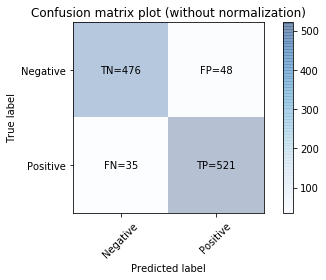

The fraction of Y values that conform with the SLA is :  0.5319444444444444
The classification error for the naive classifier on the test set is : 0.51 ( 0.5083333333333333 )


In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

#import the data and use pandas to read into a dataframe
raw = pd.read_csv('data/Y.csv')
train_data= pd.read_csv('data/X.csv',usecols =[0,1,2,3,4,5,6,7,8,9])
Time = pd.read_csv('data/X.csv',usecols =['TimeStamp']).values

#distinguish the data according to metric of SLA (either 1 or 0)
def findSLA(x,y):
	if x > y:
		return 1
	else:
		return 0
	pass

#define the train_target
raw['SLA']= raw.DispFrames.apply(lambda x: findSLA(x,18))
train_target = raw['SLA']

#data split with train70% test30%
X_train,X_test, Y_train, Y_test = train_test_split(train_data,train_target,test_size=0.3,train_size = 0.7, random_state=1) 

#Data pretreatment
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


#simulation
#increase the accuracy
classifier = LogisticRegression(multi_class='multinomial',solver='lbfgs')
classifier.fit(X_train_std,Y_train)


np.set_printoptions(precision=3)
a = classifier.intercept_
b = classifier.coef_
Y_pred =classifier.predict(X_test_std)
print ("The model has coefficients of",b,"\nThe offset is ", a)


#using Confusion matrix to calculate the classification error
cm= confusion_matrix(Y_test,Y_pred)
TN, FP, FN, TP =cm.ravel()
print ("The True Negative metric is: ",TN,"and the True Positive number is :", TP)
c_ERR = 1 - (TP+TN)/len(Y_test)
print("Classification error of this test is : %.2f" %c_ERR,"(",c_ERR,")")
class_name = ['Negative','Positive']
index = [['TN','FP'],['FN','TP']]

#Use confusion matrix to show FP FN TP TN
plt.figure()
plt.imshow(cm,cmap=plt.cm.Blues,alpha=0.3)
plt.colorbar()
plt.title("Confusion matrix plot (without normalization)")
tick_marks = np.arange(len(class_name))
for i in range(cm.shape[0]):   
	for j in range(cm.shape[1]):      
		plt.text(x=j,y=i,s=str(index[i][j])+"="+str(cm[i][j]),va='center',ha='center')
plt.xticks(tick_marks,class_name,rotation = 45)
plt.yticks(tick_marks,class_name)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


#naive method 
Rand= np.random.rand(1080)
traction = raw[raw['DispFrames']>18].count()['SLA']
SLA_p = traction/len(raw)
print("The fraction of Y values that conform with the SLA is : ", SLA_p)


Y_rand = pd.DataFrame(Rand, columns =['SLA']).SLA.apply(lambda x: findSLA(x,SLA_p))
naive_cm = confusion_matrix(Y_test,Y_rand)
TN1, FP1, FN1, TP1 =naive_cm.ravel()
ERR = 1 - (TP1+TN1)/len(Y_test)
print("The classification error for the naive classifier on the test set is : %.2f"%ERR,"(",ERR,")")





In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from pandas import Series,DataFrame
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


#import the data and use pandas to read into a dataframe
raw = pd.read_csv('data/Y.csv')
train_data= pd.read_csv('data/X.csv',usecols =[0,1,2,3,4,5,6,7,8,9])
Time = pd.read_csv('data/X.csv',usecols =['TimeStamp']).values
train_target = raw['DispFrames']

#data split with train70% test30%
X_train,X_test, Y_train, Y_test = train_test_split(train_data,train_target,test_size=0.3,train_size = 0.7, random_state=1) 

#using Linear regression for evaluation
model= LinearRegression()
model.fit(X_train,Y_train)
np.set_printoptions(precision=2)
Y_pred = model.predict(X_test)


def findSLA(x,y):
	if x > y:
		return 1
	else:
		return 0
	pass

Y_pred = pd.DataFrame(Y_pred,columns=['SLA']).SLA.apply(lambda x: findSLA(x,18))
Y_test = pd.DataFrame(Y_test).DispFrames.apply(lambda x:findSLA(x,18))
extend_cm = confusion_matrix(Y_test,Y_pred)
TN, FP, FN, TP = extend_cm.ravel()
extend_ERR = 1 - (TP+TN)/len(Y_test)

print("The extended new classifier has classification error of : %.2f"%extend_ERR,"(",extend_ERR,")")

The extended new classifier has classification error of : 0.08 ( 0.08148148148148149 )
